# Part I


## Phase 1:


In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score

from sklearn.preprocessing import OneHotEncoder

### Exploratory Data Analysis:

In [66]:
df = pd.read_csv('Spaceship data.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


**Missing values**

In [68]:
def print_nulls_info(data = df, exlude_zero = False):
    table = PrettyTable()
    if exlude_zero:
        data = data.loc[:, data.isna().sum() > 0]

    table.field_names = ['Column Name', 'Data Type', 'Null Count', 'Null Percentage']
    for column in data.columns:
        data_type = str(data[column].dtype)
        null_count = data[column].isna().sum()
        null_percentage = (null_count / len(data)) * 100
        table.add_row([column, data_type, null_count, f"{null_percentage:.2f}%"])
    print(table)

print_nulls_info()

+--------------+-----------+------------+-----------------+
| Column Name  | Data Type | Null Count | Null Percentage |
+--------------+-----------+------------+-----------------+
| PassengerId  |   object  |     0      |      0.00%      |
|  HomePlanet  |   object  |    201     |      2.31%      |
|  CryoSleep   |   object  |    217     |      2.50%      |
|    Cabin     |   object  |    199     |      2.29%      |
| Destination  |   object  |    182     |      2.09%      |
|     Age      |  float64  |    179     |      2.06%      |
|     VIP      |   object  |    203     |      2.34%      |
| RoomService  |  float64  |    181     |      2.08%      |
|  FoodCourt   |  float64  |    183     |      2.11%      |
| ShoppingMall |  float64  |    208     |      2.39%      |
|     Spa      |  float64  |    183     |      2.11%      |
|    VRDeck    |  float64  |    188     |      2.16%      |
|     Name     |   object  |    200     |      2.30%      |
| Transported  |    bool   |     0      

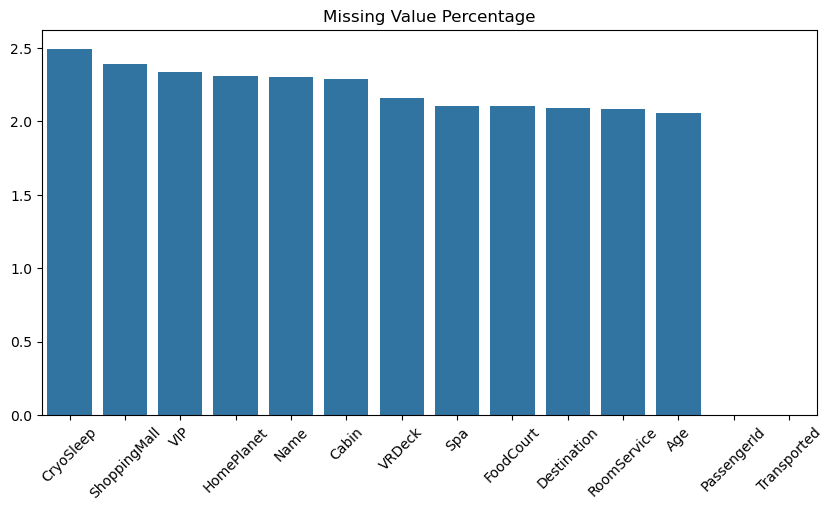

In [69]:
# Missing value visualization
missing = df.isnull().mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=missing.index, y=missing.values*100)
plt.xticks(rotation=45)
plt.title("Missing Value Percentage")
plt.xlabel("")
plt.show()

We can see that almost every feature has missing values.

This plot  measures:
- Each bar shows the precentage of missing values (NaN) in that column.
- This is not enough by itself to decide how to impute, but it tells us we must define a missing-value strategy, and that the strategy may need to be different per feature.

**Data types**

In [70]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [71]:
df.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

There are 6 continuous features, 4 categorical features (excluding the target) and 3 descriptive/qualitative features.

We will need to transform the categorical and descriptive features to numeric so we can train the classifiers.

Assumption being made:
- The models we plan to use (from scikit-learn) expect numeric inputs.
- For categorical columns we will use one-hot encoding (or an equivalent encoding) so the model does not assume an artificial order between categories.

#### Target Analysis:

***AI used [1]***

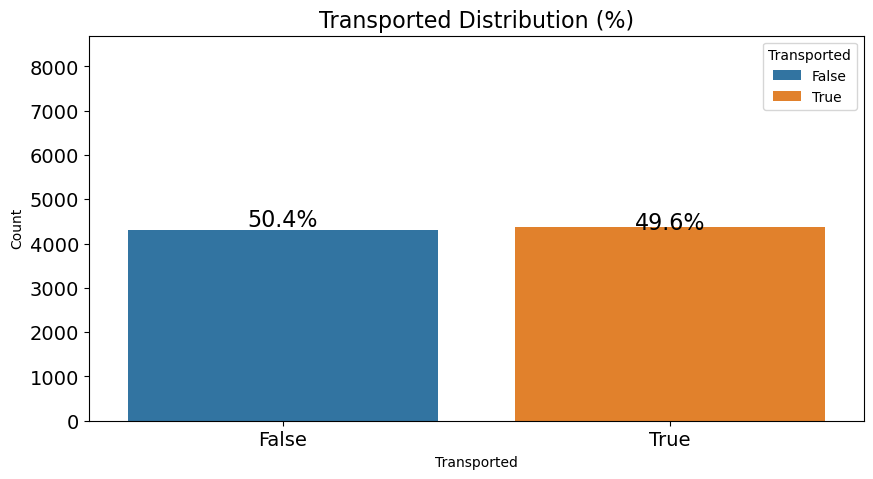

In [72]:

# Counts and proportions
counts = df['Transported'].value_counts()
proportions = df['Transported'].value_counts(normalize=True)

proportions_str = [f'{p:.1%}' for p in proportions]

# Plot
plt.figure(figsize=(10, 5))
sns.countplot(x='Transported', data=df, hue='Transported')
plt.title('Transported Distribution (%)', fontsize=16)
plt.xlabel('Transported')
plt.ylabel('Count')

plt.ylim(0, len(df))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Annotate percentages
for i, count in enumerate(counts):
    plt.text(i, count, proportions_str[i], ha='center', fontsize=16)

plt.show()


The **`Transported`** column is the label we want to predict.

Class balance check:
- We use a count plot of `Transported` to verify that the dataset is roughly balanced.
- This matters because accuracy alone can be misleading when classes are imbalanced (a classifier could predict the majority class and still get a high accuracy).

***



#### Feature Analysis:

**Continuous features**

Text(0.5, 0, 'Age (years)')

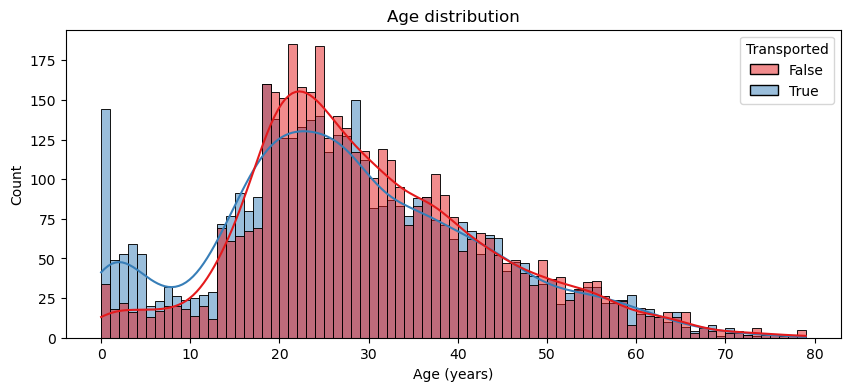

In [73]:
# Figure size
plt.figure(figsize=(10,4))

# Histogram
sns.histplot(data=df, x='Age', hue='Transported', binwidth=1, kde=True, palette="Set1")

# Aesthetics
plt.title('Age distribution')
plt.xlabel('Age (years)')

We noticed theres a separation between ages.
* 0-18 years-olds were more likely to be transported
* 18-40 were less likely to be transported.
* 40+ were equally likely to be transported.

We will probably create age group feature later because of those insights. 

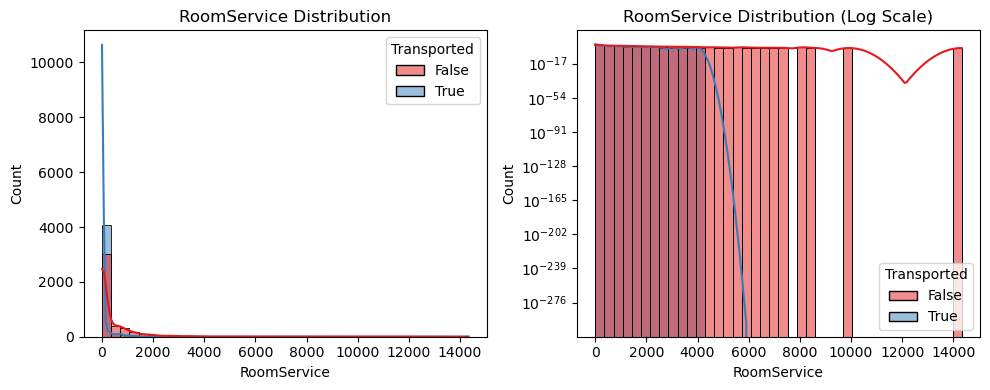

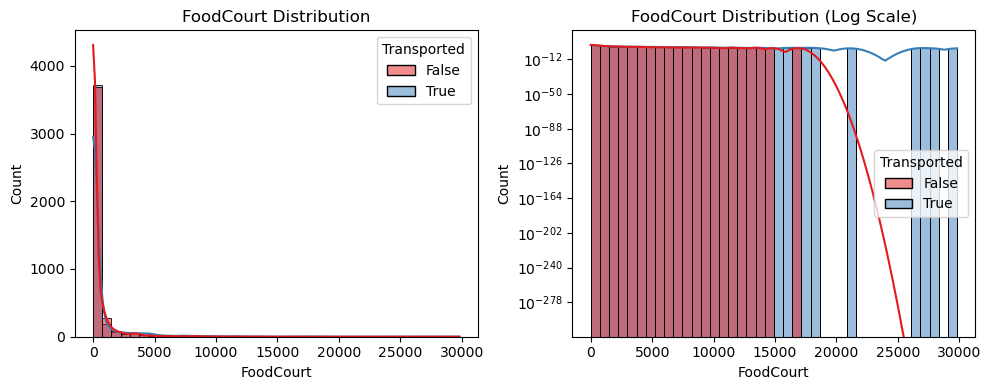

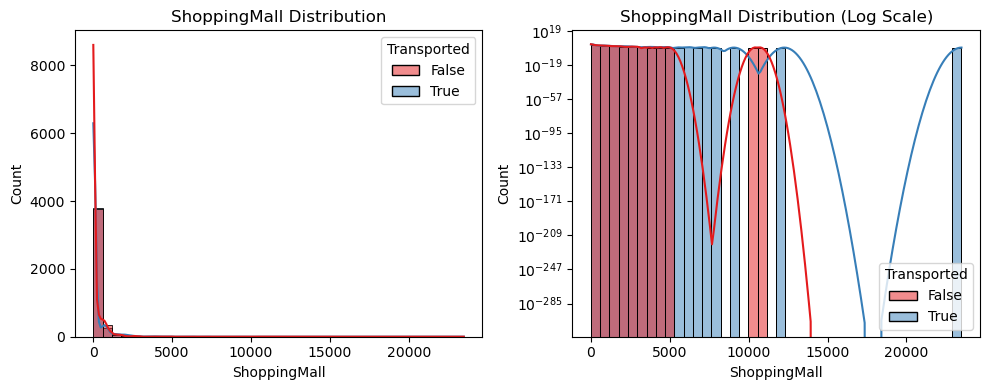

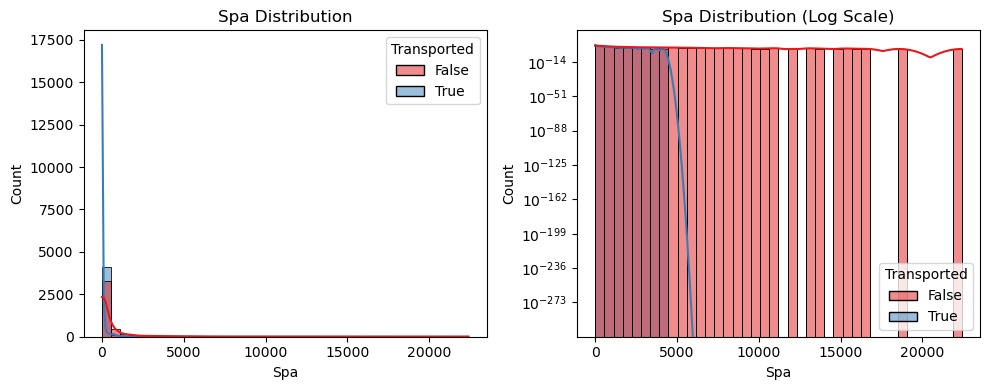

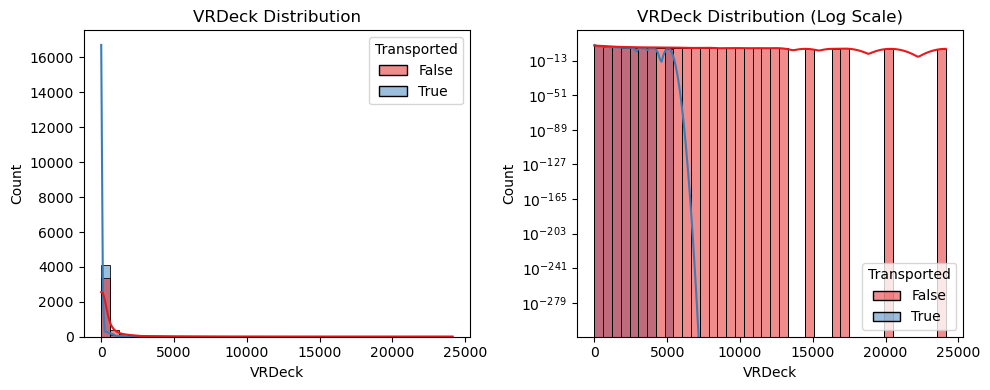

In [74]:
continuous_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for col in continuous_cols:
    if col == "Age":
        continue

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title(col + " Distribution")
    sns.histplot(
        df,
        x=col,
        hue="Transported",
        bins=40,
        kde=True,
        palette="Set1"
    )
    plt.tight_layout()
    
    plt.subplot(1, 2, 2)
    plt.title(col + " Distribution (Log Scale)")
    sns.histplot(
        df,
        x=col,
        hue="Transported",
        bins=40,
        kde=True,
        palette="Set1"
    )
    plt.yscale('log')
    plt.tight_layout()
    plt.show()

Notes about the spending distributions (RoomService, FoodCourt, ShoppingMall, Spa, VRDeck):

- The y-axis is limited to zoom in, because the distributions are highly skewed.
- The plots show a heavy concentration at 0 (most passengers did not spend on that service).
- A small number of passengers have very large values (outliers). This implies:
  - Mean-based imputation can be biased upward.
  - Median (or a dedicated "missing vs zero" indicator) might safer than mean, unless we verify otherwise with experiments.

In [75]:
spending_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df[~(df[spending_cols].isna().any(axis=1)) & (df[spending_cols].sum(axis=1) == 0)].shape

(3247, 14)

3247 passengers didnt spend money at all,we will later create boolean var of NoSpending, to tell if passenger spent money or not.

**Categorical Analysis**

In [76]:
cat_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
cat_features

['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

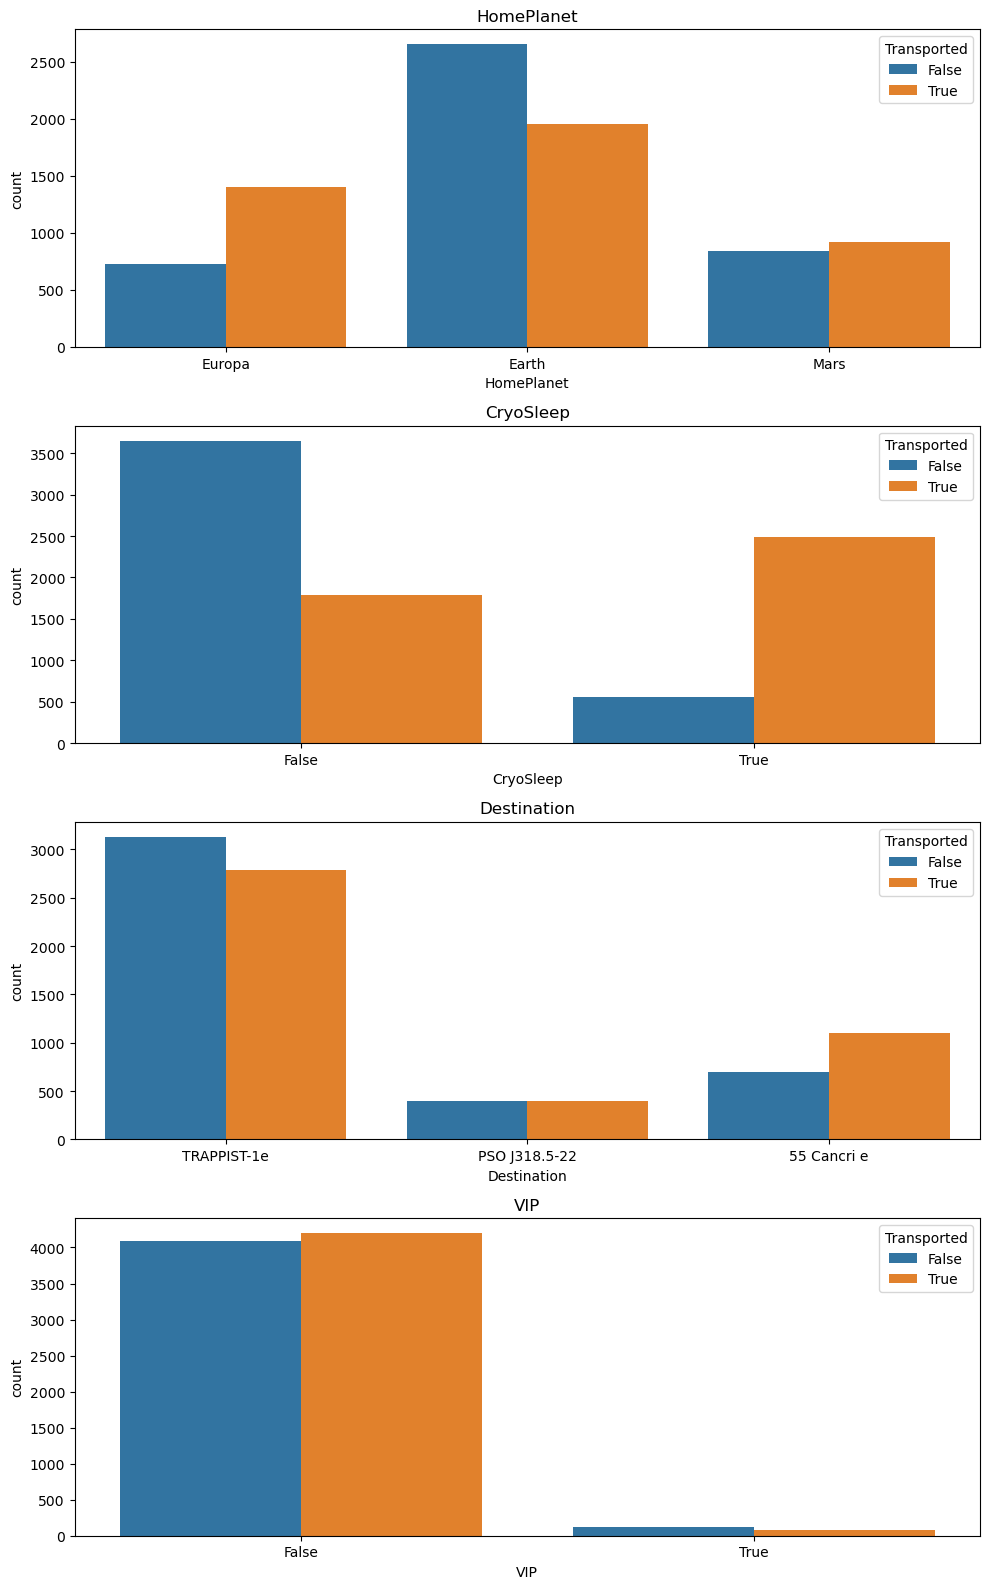

In [77]:
target = 'Transported'

# Plot categorical features
fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(cat_features):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=df, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

Consider drop the VIP feature because it doesn't help to predict Transported/not.

The analysis indicates that CryoSleep is strongly associated with the target variable, while HomePlanet and Destination show moderate effects.


***

## Phase 2:



### Data Prepping:

* We want to extract passengers group to learn group sizes.
* We want to extract deck cabin number and side from cabin.
* We want to extract surnames to identify families.

***AI used [2]***

In [78]:
# Extract PassengerGroup from PassengerId
df['PassengerGroup'] = df['PassengerId'].str.split('_').str[0].astype(int)

# Compute group size
group_sizes = df['PassengerGroup'].value_counts()
df['GroupSize'] = df['PassengerGroup'].map(group_sizes)

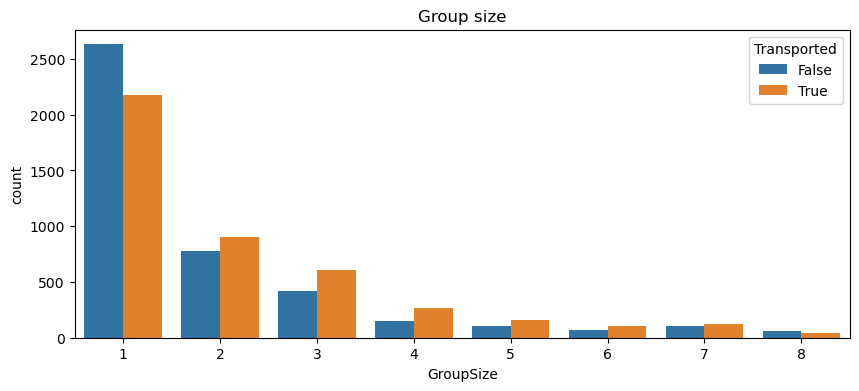

In [79]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='GroupSize', hue='Transported')
plt.title('Group size')
plt.show()

Theres separation between solo passengers and groups. Solo passengers are less likely to be transported then groups.

We will create binary feature Solo, to track which passenger is traveling solo.

In [80]:
df['Solo'] = df['GroupSize'] == 1

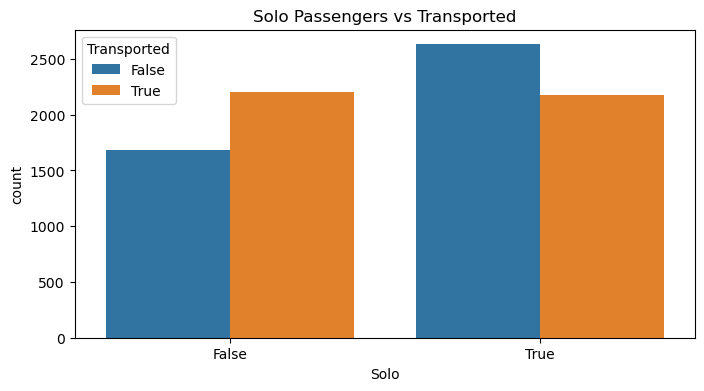

In [81]:
# Solos vs Transported
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Solo', hue='Transported')
plt.title('Solo Passengers vs Transported')
plt.show()

**Spendings**

Creating TotalSpent and NoSpendings features.

In [82]:
spending_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Sum spendings 
df['TotalSpent'] = df[spending_cols].sum(axis=1)

# NoSpendings column
df['NoSpendings'] = (df['TotalSpent'] == 0).astype(int)

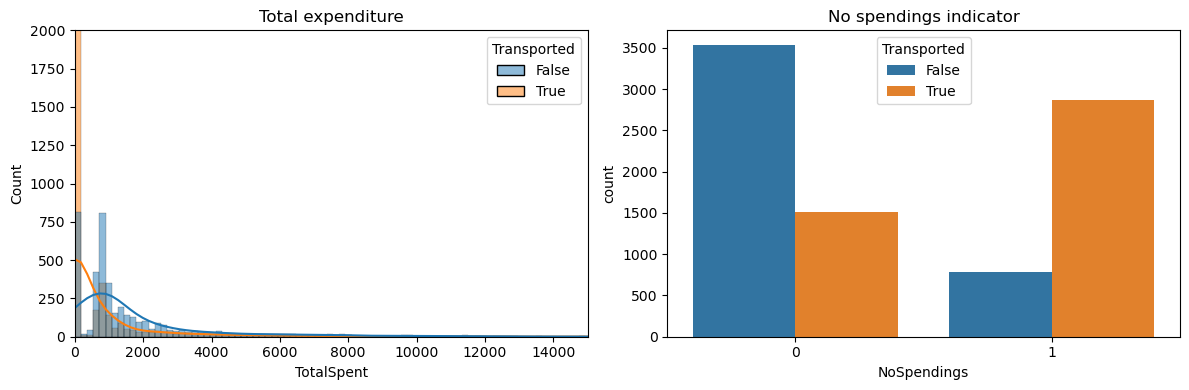

In [83]:
fig=plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data=df, x='TotalSpent', hue='Transported', bins=200, kde=True)
plt.title('Total expenditure')
plt.ylim([0,2000])
plt.xlim([0,15000])

plt.subplot(1,2,2)
sns.countplot(data=df, x='NoSpendings', hue='Transported')
plt.title('No spendings indicator')
fig.tight_layout()

Now it's very clear - passengers who didn't spent money were more likely to be transported.

**Age Groups**

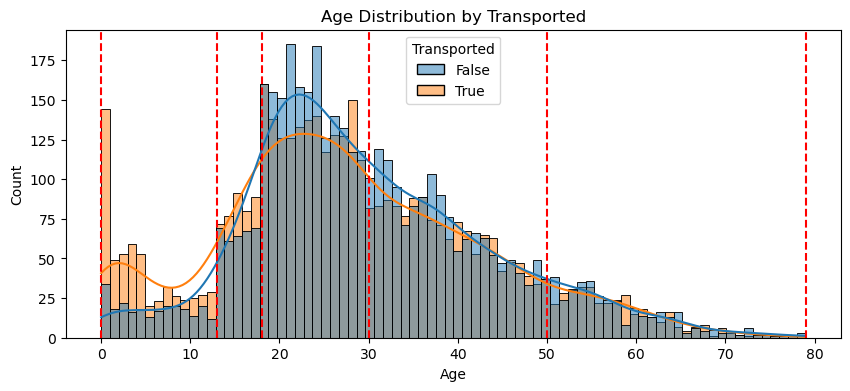

In [84]:
# Plot distribution of new features 
plt.figure(figsize=(10,4)) 
sns.histplot(data=df, x='Age', hue='Transported',kde=True, bins=80) 
plt.title('Age Distribution by Transported')

age_lines = [0, 13, 18, 30, 50, df['Age'].max()]
for line in age_lines:
    plt.axvline(x=line, color='red', linestyle='--')

plt.show()

We now divide passengers to age groups, this will later help us visualize data and fill in missing features. Later we will drop this column.

In [85]:
df['Age_group']=np.nan
df.loc[df['Age']<=13,'Age_group']='Age_0-13'
df.loc[(df['Age']>13) & (df['Age']<=18),'Age_group']='Age_14-18'
df.loc[(df['Age']>18) & (df['Age']<=30),'Age_group']='Age_19-30'
df.loc[(df['Age']>30) & (df['Age']<=50),'Age_group']='Age_31-50'
df.loc[df['Age']>50,'Age_group']='Age_51+'

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18928\400463717.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Age_0-13' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Age']<=13,'Age_group']='Age_0-13'


we decided on those age groups because of the plot above, we can see that the age vs transported plot is naturally divided to those groups.

Text(0.5, 1.0, 'Age group distribution')

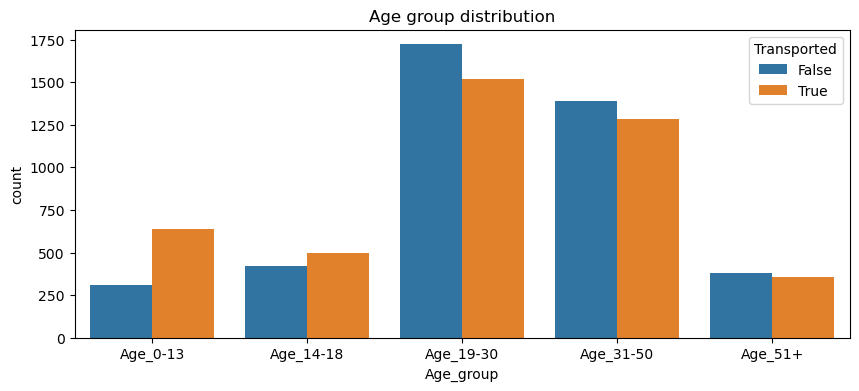

In [86]:
plt.figure(figsize=(10,4))
g=sns.countplot(data=df, x='Age_group', hue='Transported', order=['Age_0-13','Age_14-18','Age_19-30','Age_31-50','Age_51+'])
plt.title('Age group distribution')

**Cabin**

We will now extract deck, cabin number and side from cabin.

In [87]:
# Replace NaN's with outliers for now (so we can split feature)
df['Cabin'].fillna('Z/9999/Z', inplace=True)

cabin = df['Cabin'].str.split('/', expand=True)
df['Cabin_deck'] = cabin[0]
df['Cabin_number'] = cabin[1].astype(int)
df['Cabin_side'] = cabin[2]

# Put Nan's back in (we will fill these later)
df.loc[df['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
df.loc[df['Cabin_number']==9999, 'Cabin_number']=np.nan
df.loc[df['Cabin_side']=='Z', 'Cabin_side']=np.nan

# Drop Cabin (we don't need it anymore)
df.drop('Cabin', axis=1, inplace=True)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18928\2515684296.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna('Z/9999/Z', inplace=True)


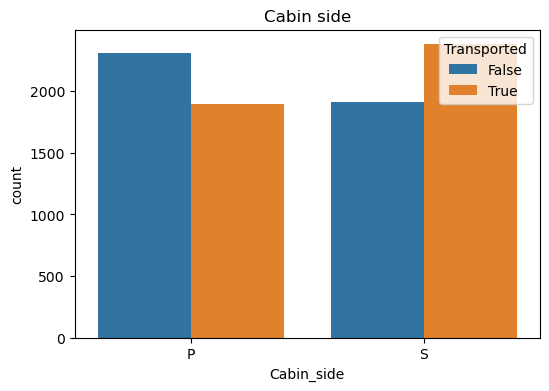

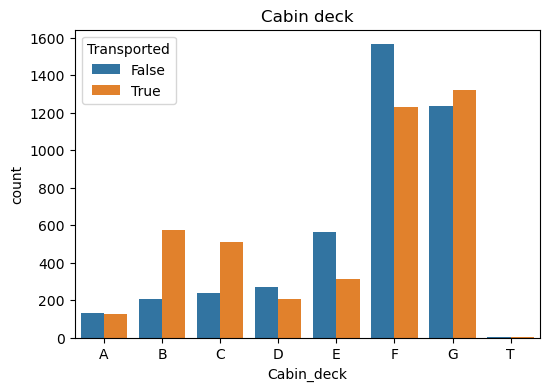

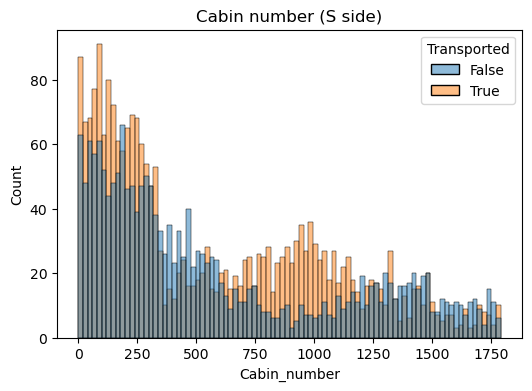

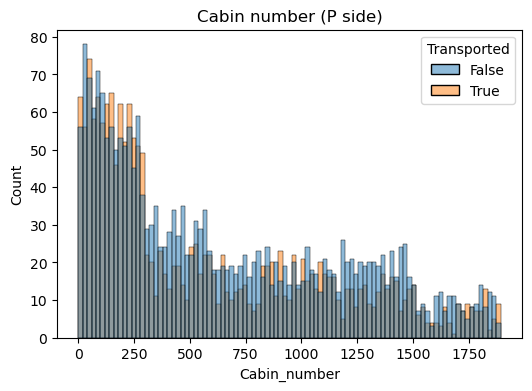

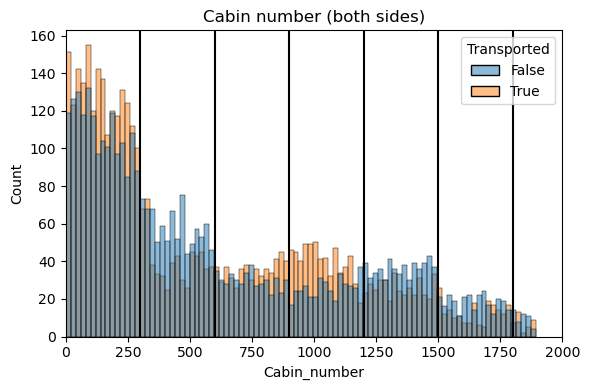

In [88]:
figsize=(6,4)
# Plot distribution of new features
plt.figure(figsize=figsize)
sns.countplot(data=df, x='Cabin_side', hue='Transported')
plt.title('Cabin side')

plt.figure(figsize=figsize)
sns.countplot(data=df, x='Cabin_deck', hue='Transported', order=['A','B','C','D','E','F','G','T'])
plt.title('Cabin deck')

plt.figure(figsize=figsize)
sns.histplot(
    data=df[df["Cabin_side"] == "S"],
    x="Cabin_number",
    hue="Transported",
    binwidth=20
)
plt.title('Cabin number (S side)')

plt.figure(figsize=figsize)
sns.histplot(
    data=df[df["Cabin_side"] == "P"],
    x="Cabin_number",
    hue="Transported",
    binwidth=20
)
plt.title('Cabin number (P side)')

plt.figure(figsize=figsize)
sns.histplot(data=df, x='Cabin_number', hue='Transported',binwidth=20)
plt.axvline(300, color='black')
plt.axvline(600,  color='black')
plt.axvline(900, color='black')
plt.axvline(1200, color='black')
plt.axvline(1500, color='black')
plt.axvline(1800, color='black')
plt.title('Cabin number (both sides)')
plt.xlim([0,2000])

plt.tight_layout()
plt.show()


we noticed we can aggregate cabin number from both ship sides, now we got a result we can divide into chunks of 300 cabins. This will allow us to compress this feature into categorical feature.

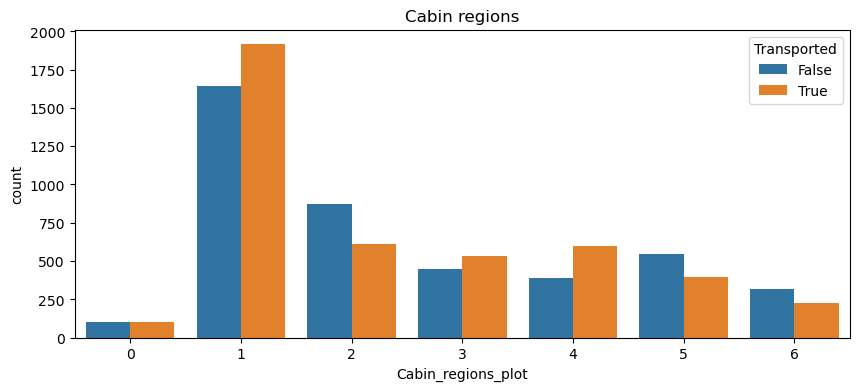

In [89]:
max_cabin_num = max(df['Cabin_number'])

# Cabin region feature one-hot encoded
df['Cabin_region1']=(df['Cabin_number']<300).astype(int)
df['Cabin_region2']=((df['Cabin_number']>=300) & (df['Cabin_number']<600)).astype(int)
df['Cabin_region3']=((df['Cabin_number']>=600) & (df['Cabin_number']<900)).astype(int)
df['Cabin_region4']=((df['Cabin_number']>=900) & (df['Cabin_number']<1200)).astype(int)
df['Cabin_region5']=((df['Cabin_number']>=1200) & (df['Cabin_number']<1500)).astype(int)
df['Cabin_region6']=((df['Cabin_number']>=1500) & (df['Cabin_number']<=max_cabin_num)).astype(int)
df['Cabin_region7']=(df['Cabin_number']>max_cabin_num).astype(int)


# Plot distribution of new features
plt.figure(figsize=(10,4))
df['Cabin_regions_plot']=(df['Cabin_region1']+2*df['Cabin_region2']+3*df['Cabin_region3']+4*df['Cabin_region4']+5*df['Cabin_region5']+6*df['Cabin_region6']+7*df['Cabin_region7']).astype(int)
sns.countplot(data=df, x='Cabin_regions_plot', hue='Transported')
plt.title('Cabin regions')
df.drop('Cabin_regions_plot', axis=1, inplace=True)

#### Filling NaNs

**Last name**

In [90]:
missing_name_count = df['Name'].isna().sum()
print("Missing names before filling:", missing_name_count)

Missing names before filling: 200


In [91]:
# Fill missing names
df['Name'].fillna('Unknown Unknown', inplace=True)

# Split Name into First and Last names
full_name = df['Name'].str.split(' ')
df['First_name'] = full_name.str[0]
df['Last_name'] = full_name.str[1]

print("first name examples:", df['First_name'].unique()[:10])
print("last name examples:", df['Last_name'].unique()[:10])

first name examples: ['Maham' 'Juanna' 'Altark' 'Solam' 'Willy' 'Sandie' 'Billex' 'Candra'
 'Andona' 'Erraiam']
last name examples: ['Ofracculy' 'Vines' 'Susent' 'Santantines' 'Hinetthews' 'Jacostaffey'
 'Beston' 'Flatic' 'Barne' 'Baketton']


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18928\1956995864.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Name'].fillna('Unknown Unknown', inplace=True)


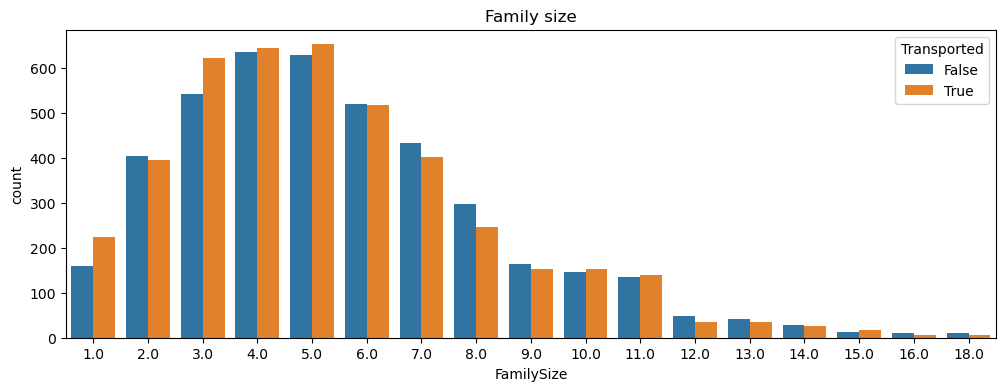

In [92]:
# Family size feature
df['FamilySize'] = df['Last_name'].map(df['Last_name'].value_counts())

df.loc[df['Last_name'] == 'Unknown', 'Last_name'] = np.nan
# Putting NaN's back in for FamilySize where names were missing
df.loc[df['FamilySize'] == missing_name_count, 'FamilySize'] = np.nan

# Drop Name
df.drop('Name', axis=1, inplace=True)

plt.figure(figsize=(12,4))
sns.countplot(data=df, x='FamilySize', hue='Transported')
plt.title('Family size')
plt.show()

### Missing Values

**Counting missing values**

In [93]:
print_nulls_info(exlude_zero=True)

+--------------+-----------+------------+-----------------+
| Column Name  | Data Type | Null Count | Null Percentage |
+--------------+-----------+------------+-----------------+
|  HomePlanet  |   object  |    201     |      2.31%      |
|  CryoSleep   |   object  |    217     |      2.50%      |
| Destination  |   object  |    182     |      2.09%      |
|     Age      |  float64  |    179     |      2.06%      |
|     VIP      |   object  |    203     |      2.34%      |
| RoomService  |  float64  |    181     |      2.08%      |
|  FoodCourt   |  float64  |    183     |      2.11%      |
| ShoppingMall |  float64  |    208     |      2.39%      |
|     Spa      |  float64  |    183     |      2.11%      |
|    VRDeck    |  float64  |    188     |      2.16%      |
|  Age_group   |   object  |    179     |      2.06%      |
|  Cabin_deck  |   object  |    199     |      2.29%      |
| Cabin_number |  float64  |    199     |      2.29%      |
|  Cabin_side  |   object  |    199     

About 2% of the data is missing.

**Missing values per passenger**

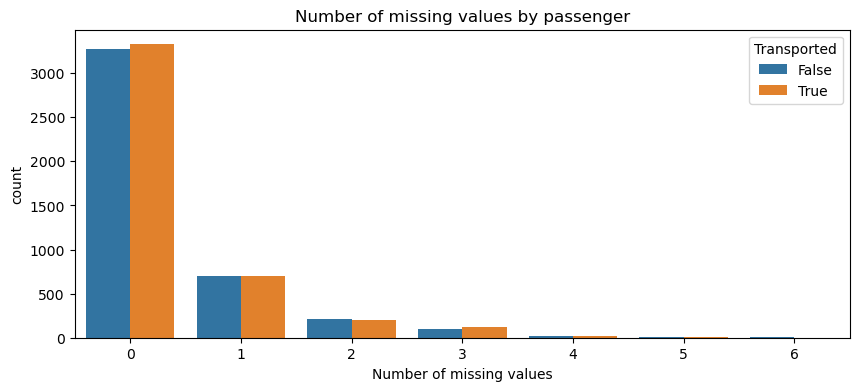

In [94]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x=df.isna().sum(axis=1), hue='Transported')
plt.title('Number of missing values by passenger')
plt.xlabel('Number of missing values')
plt.show()

Missing values are not related to transported column. 

***AI used [3]***

In [95]:
# Number of passenger with missing values 
num_passengers_with_missing = (df.isna().any(axis=1)).sum()
print("Number of passengers with missing values:", num_passengers_with_missing)

Number of passengers with missing values: 2087


Text(0.5, 1.0, 'Heatmap of missing values')

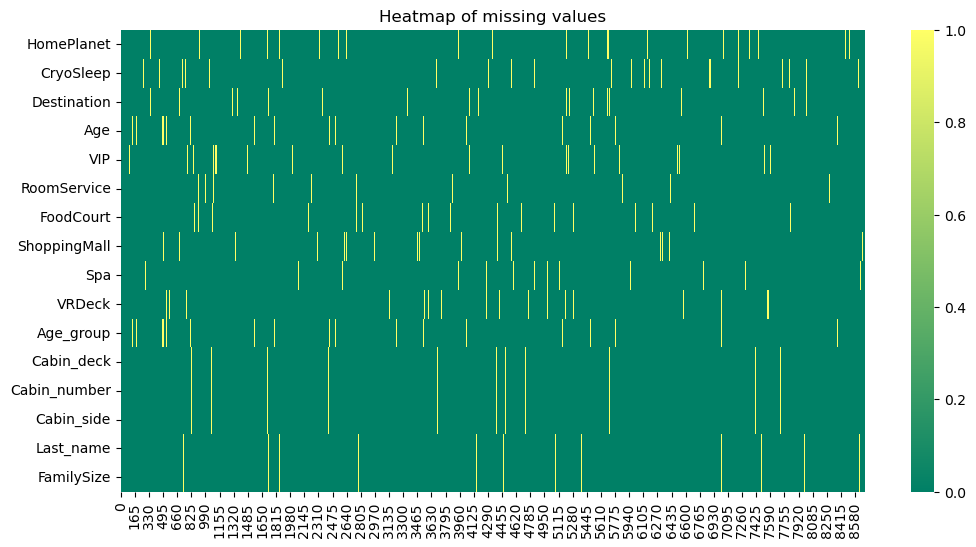

In [96]:
na_cols=df.columns[df.isna().any()].tolist()
# Heatmap of missing values
plt.figure(figsize=(12,6))
sns.heatmap(df[na_cols].isna().T, cmap='summer')
plt.title('Heatmap of missing values')

Missingness co-occurrence (heatmap):

- The heatmap indicates which features tend to be missing together for the same row.
- When missingness aligns across derived features (for example, `Last_name` and `FamilySize` after splitting `Name`), it is expected because they originate from the same raw column.
- This supports the assumption that imputations for these derived features should be consistent and may use shared logic (for example, using `PassengerGroup` to infer family-related fields).

**HomePlanet and Group**

***AI used [4]***

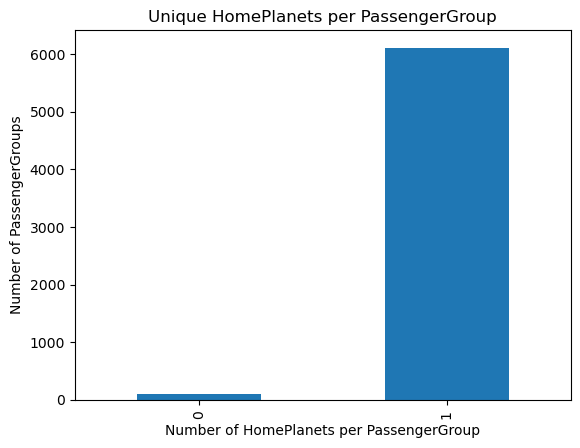

In [97]:
unique_hp_per_group = (
    df.groupby('PassengerGroup')['HomePlanet']
      .nunique()
)

unique_hp_per_group.value_counts().sort_index().plot(kind='bar')

plt.xlabel('Number of HomePlanets per PassengerGroup')
plt.ylabel('Number of PassengerGroups')
plt.title('Unique HomePlanets per PassengerGroup')
plt.show()

HomePlanet vs PassengerGroup:

- The plot suggests that passengers in the same `PassengerGroup` almost always share the same `HomePlanet`.
- Assumption used for imputation:
  - If a group has at least one known `HomePlanet`, we impute the missing `HomePlanet` values in that group with the group's most frequent `HomePlanet`.


***AI used [5]***

In [98]:
single_hp_groups = unique_hp_per_group[unique_hp_per_group == 1].index

group_to_hp = (df[df['PassengerGroup'].isin(single_hp_groups)]
               .groupby('PassengerGroup')['HomePlanet'].first())

df.loc[df['HomePlanet'].isna(), 'HomePlanet'] = (
    df.loc[df['HomePlanet'].isna(), 'PassengerGroup'].map(group_to_hp))

# print number of missing values
print("Number of missing HomePlanet values before filling:", df['HomePlanet'].isna().sum())
print("HomePlanet missing values filled from PassengerGroup:", df['HomePlanet'].isna().sum() - df['HomePlanet'].isna().sum())
print("Number of missing HomePlanet values after filling:", df['HomePlanet'].isna().sum())


Number of missing HomePlanet values before filling: 111
HomePlanet missing values filled from PassengerGroup: 0
Number of missing HomePlanet values after filling: 111


**HomePlant and Cabin_Deck**

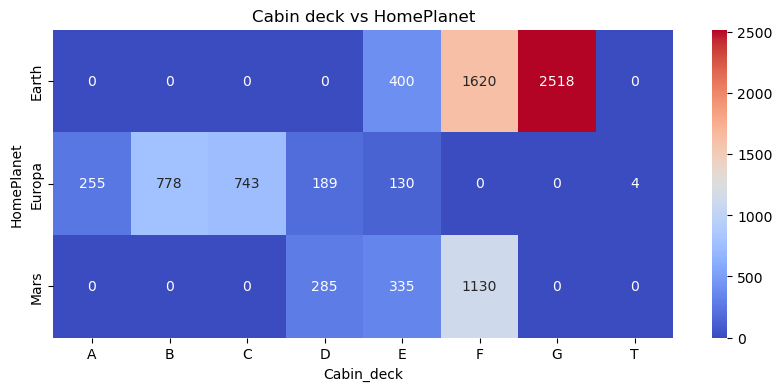

In [99]:
CD_HP = df.groupby(['Cabin_deck', 'HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

plt.figure(figsize=(10,4))
sns.heatmap(CD_HP.T, annot=True, fmt=".0f", cmap='coolwarm')
plt.title('Cabin deck vs HomePlanet')
plt.show()

HomePlanet vs Cabin_deck:

From the heatmap we identify decks that appear to map almost deterministically to a single `HomePlanet` in the labeled data.

How this is used:
- If a deck is effectively 100% associated with one planet in the observed data, we can impute missing `HomePlanet` for passengers on that deck using that planet.

Important caveat:
- This relies on the training data distribution and may not generalize.
- We should treat it as a heuristic and verify its impact by comparing classifier performance with and without this imputation rule.

In [100]:
# Start number of missing HomePlanet values
HP_starts = df['HomePlanet'].isna().sum()

# Fill missing HomePlanet values based on Cabin_deck
df.loc[(df['HomePlanet'].isna()) & (df['Cabin_deck'].isin(['A', 'B', 'C', 'T'])), 'HomePlanet'] = 'Europa'
df.loc[(df['HomePlanet'].isna()) & (df['Cabin_deck'].isin(['G'])), 'HomePlanet'] = 'Earth'

# Print number of missing values
print("Number of missing HomePlanet values before filling:", HP_starts)
print("HomePlanet missing values filled from Cabin_deck:", HP_starts - df['HomePlanet'].isna().sum())
print("Number of missing HomePlanet values after filling:", df['HomePlanet'].isna().sum())

Number of missing HomePlanet values before filling: 111
HomePlanet missing values filled from Cabin_deck: 48
Number of missing HomePlanet values after filling: 63


**HomePlanet and Last_Name**

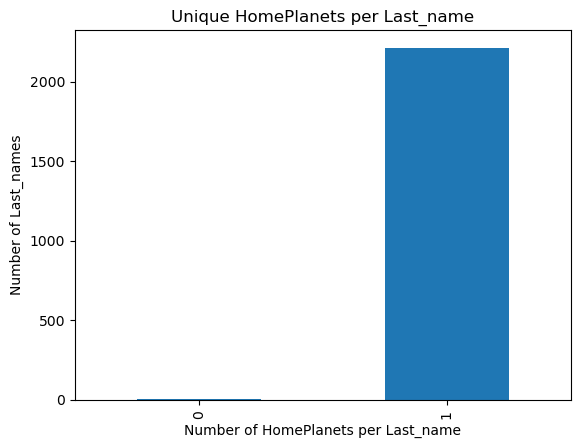

In [101]:
unique_hp_per_group_LN = (
    df.groupby('Last_name')['HomePlanet']
      .nunique()
)

unique_hp_per_group_LN.value_counts().sort_index().plot(kind='bar')

plt.xlabel('Number of HomePlanets per Last_name')
plt.ylabel('Number of Last_names')
plt.title('Unique HomePlanets per Last_name')
plt.show()

Passengers with the same last name came from the same home planet

In [102]:
HP_bef = df['HomePlanet'].isna().sum()
single_hp_groups_LN = unique_hp_per_group_LN[unique_hp_per_group_LN == 1].index

group_to_hp = (df[df['Last_name'].isin(single_hp_groups_LN)]
               .groupby('Last_name')['HomePlanet'].first())

df.loc[df['HomePlanet'].isna(), 'HomePlanet'] = (
    df.loc[df['HomePlanet'].isna(), 'Last_name'].map(group_to_hp))

# print number of missing values
print("Number of missing HomePlanet values before filling:",HP_bef )
print("HomePlanet missing values filled from Last_name:", HP_bef - df['HomePlanet'].isna().sum())
print("Number of missing HomePlanet values after filling:", df['HomePlanet'].isna().sum())


Number of missing HomePlanet values before filling: 63
HomePlanet missing values filled from Last_name: 55
Number of missing HomePlanet values after filling: 8


In [103]:
df[df['HomePlanet'].isna()]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,Cabin_region1,Cabin_region2,Cabin_region3,Cabin_region4,Cabin_region5,Cabin_region6,Cabin_region7,First_name,Last_name,FamilySize
225,0242_01,NaN,False,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,...,1,0,0,0,0,0,0,Almone,Sté,1.0
2274,2443_01,NaN,False,TRAPPIST-1e,31.0,False,1458.0,421.0,76.0,0.0,...,1,0,0,0,0,0,0,Unknown,NaN,NaN
2631,2817_01,NaN,False,TRAPPIST-1e,25.0,False,237.0,0.0,910.0,0.0,...,0,1,0,0,0,0,0,Sealfs,Sutty,1.0
3091,3331_01,NaN,False,TRAPPIST-1e,40.0,False,666.0,4.0,83.0,0.0,...,0,0,1,0,0,0,0,Unknown,NaN,NaN
4548,4840_01,NaN,True,TRAPPIST-1e,36.0,False,0.0,0.0,NaN,0.0,...,0,0,0,1,0,0,0,Unknown,NaN,NaN
5252,5603_01,NaN,False,TRAPPIST-1e,34.0,False,170.0,1256.0,0.0,3926.0,...,0,1,0,0,0,0,0,Kocha,Cluitty,1.0
5634,5989_01,NaN,False,TRAPPIST-1e,20.0,False,0.0,0.0,NaN,703.0,...,0,0,0,1,0,0,0,Darrie,Holcompton,1.0
5762,6108_01,NaN,False,TRAPPIST-1e,13.0,False,206.0,28.0,0.0,1.0,...,0,0,0,1,0,0,0,Unknown,NaN,NaN


The remaining Passengers all have the same Destination and are all not VIPs


**HomePlant and VIP**

<Axes: xlabel='HomePlanet', ylabel='VIP'>

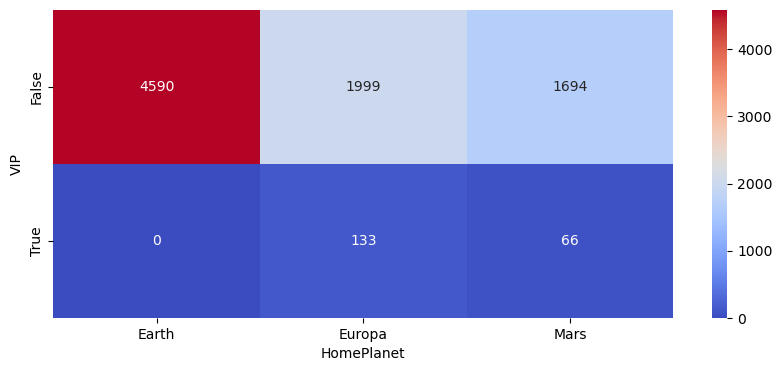

In [104]:
# Joint distribution of HomePlanet and VIP
HP_vip=df.groupby(['HomePlanet','VIP'])['VIP'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(HP_vip.T, annot=True, fmt='g', cmap='coolwarm')

VIP vs HomePlanet:

VIP is rare compared to non-VIP, so raw counts can be misleading.
To avoid over-interpreting noise:
- We cross-check with additional relationships (for example Destination vs HomePlanet) before deciding on any VIP-driven imputation or feature engineering.

<Axes: xlabel='HomePlanet', ylabel='Destination'>

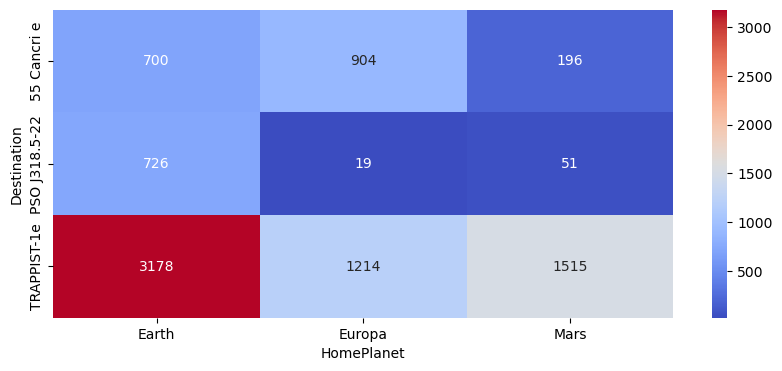

In [105]:
# Joint distribution of HomePlanet and Destination
HP_D=df.groupby(['HomePlanet','Destination'])['Destination'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(HP_D.T, annot=True, fmt='g', cmap='coolwarm')

In [106]:
ddd = df[df['HomePlanet'].isna()]
ddd['Cabin_deck']

225     F
2274    D
2631    F
3091    F
4548    F
5252    E
5634    F
5762    F
Name: Cabin_deck, dtype: object

Missing 8 are only from deck D, E and F

By far most passengers heading to TRAPPIST-1e are from Earth, but we remember that earlier we found that no one from deck D is also from Earth.

In [107]:
# Missing values before
HP_bef=df['HomePlanet'].isna().sum()

# Fill remaining HomePlanet missing values with Earth (if not on deck D) or Mars (if on Deck D)
df.loc[(df['HomePlanet'].isna()) & ~(df['Cabin_deck']=='D'), 'HomePlanet']='Earth'
df.loc[(df['HomePlanet'].isna()) & (df['Cabin_deck']=='D'), 'HomePlanet']='Mars'

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',df['HomePlanet'].isna().sum())

#HomePlanet missing values before: 8
#HomePlanet missing values after: 0


HomePlanet has no missing values.

**Filling Destination**

***AI used [6]***

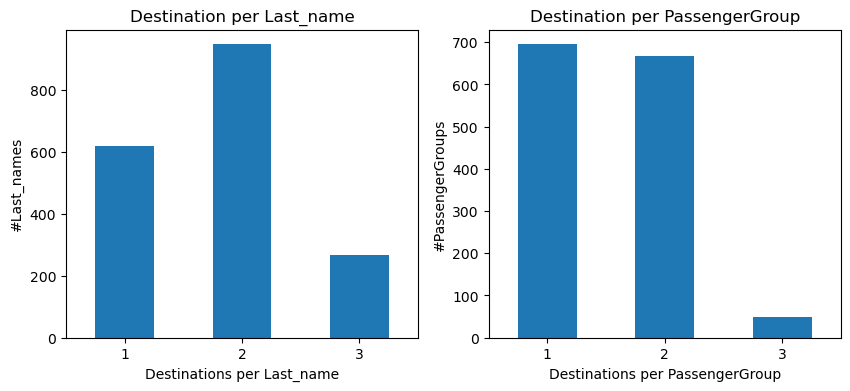

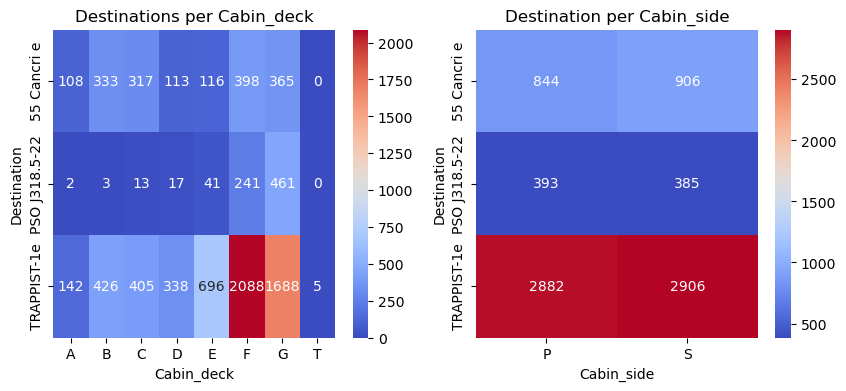

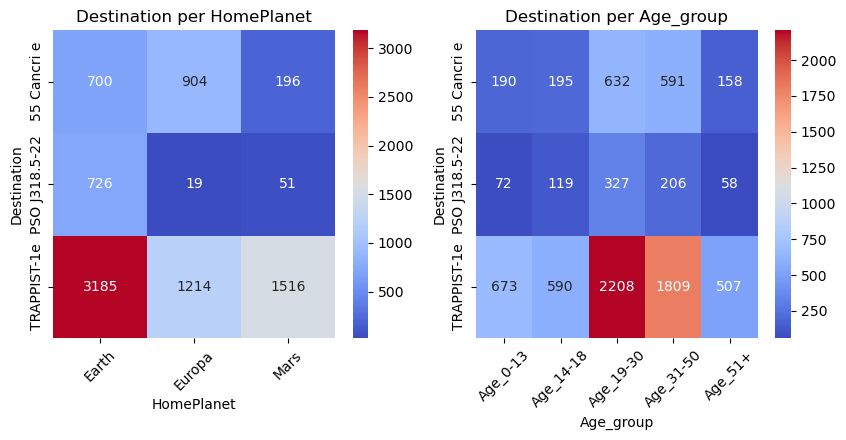

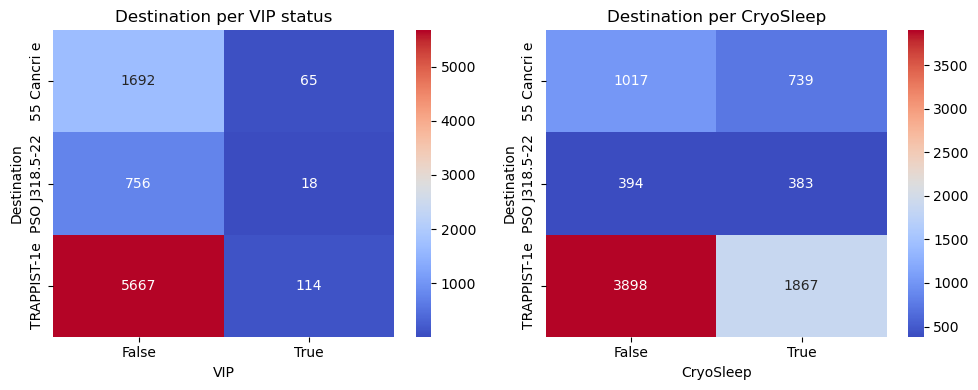

In [108]:
figsize=(10,4)

plt.figure(figsize=figsize)

# Destination per Last_name
multi_lastname_groups = df['Last_name'].value_counts()
multi_lastname_groups = multi_lastname_groups[multi_lastname_groups > 1].index

plt.subplot(1,2,1)
dst_LN = (
    df[df['Last_name'].isin(multi_lastname_groups)]
    .groupby('Last_name')['Destination']
    .nunique()
)
dst_LN.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Destinations per Last_name')
plt.xticks(rotation=0)
plt.ylabel('#Last_names')
plt.title('Destination per Last_name')

# Destination per PassengerGroup (only groups with more than 1 member)
multi_passenger_groups = df['PassengerGroup'].value_counts()
multi_passenger_groups = multi_passenger_groups[multi_passenger_groups > 1].index

plt.subplot(1,2,2)
dst_pg = (
    df[df['PassengerGroup'].isin(multi_passenger_groups)]
    .groupby('PassengerGroup')['Destination']
    .nunique()
)
dst_pg.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Destinations per PassengerGroup')
plt.ylabel('#PassengerGroups')
plt.xticks(rotation=0)
plt.title('Destination per PassengerGroup')

plt.figure(figsize=figsize)

# Destination per Cabin_deck
plt.subplot(1,2,1)
CS_D = df.groupby(['Cabin_deck', 'Destination'])['Destination'].size().unstack().fillna(0)
sns.heatmap(CS_D.T, annot=True, fmt='g', cmap='coolwarm')
plt.title('Destinations per Cabin_deck')
plt.xticks(rotation=0)

# Destination per Cabin_side
plt.subplot(1,2,2)
dst_cs=df.groupby(['Cabin_side','Destination'])['Destination'].size().unstack().fillna(0)
sns.heatmap(dst_cs.T, annot=True, fmt='g', cmap='coolwarm')
plt.title('Destination per Cabin_side')

plt.figure(figsize=figsize)

# Destination per homeplanet
HP_D= df.groupby(['HomePlanet', 'Destination'])['Destination'].size().unstack().fillna(0)
plt.subplot(1,2,1)
sns.heatmap(HP_D.T, annot=True, fmt='g', cmap='coolwarm')
plt.title('Destination per HomePlanet')
plt.xticks(rotation=45)

# Destination per age group
AG_D= df.groupby(['Age_group', 'Destination'])['Destination'].size().unstack().fillna(0)
plt.subplot(1,2,2)
sns.heatmap(AG_D.T, annot=True, fmt='g', cmap='coolwarm')
plt.title('Destination per Age_group')
plt.xticks(rotation=45)

plt.figure(figsize=figsize)

# Destination per total spent
TS_D= df.groupby(['VIP', 'Destination'])['Destination'].size().unstack().fillna(0)
plt.subplot(1,2,1)
sns.heatmap(TS_D.T, annot=True, fmt='g', cmap='coolwarm')
plt.title('Destination per VIP status')

# Destination per CryoSleep
CS_D= df.groupby(['CryoSleep', 'Destination'])['Destination'].size().unstack().fillna(0)
plt.subplot(1,2,2)
sns.heatmap(CS_D.T, annot=True, fmt='g', cmap='coolwarm')
plt.title('Destination per CryoSleep')


plt.tight_layout()
plt.show()

In [109]:
dest_cnt = df['Destination'].value_counts()

print("Destination value counts:\n", dest_cnt)

sum_dst = dest_cnt.sum()
print("Total number of passengers with Destination:", sum_dst)
print(" ")

print("TRAPPIST-1e percentage:", dest_cnt['TRAPPIST-1e']/sum_dst*100)
print("55 Cancris percentage:", dest_cnt['55 Cancri e']/sum_dst*100)
print("PSO J318.5-22 percentage:", dest_cnt['PSO J318.5-22']/sum_dst*100)

Destination value counts:
 Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64
Total number of passengers with Destination: 8511
 
TRAPPIST-1e percentage: 69.49829632240629
55 Cancris percentage: 21.149101163200566
PSO J318.5-22 percentage: 9.352602514393137


Destination imputation decision:

After checking multiple conditional plots and tables, we did not find a strong rule-based relationship that predicts `Destination` reliably from other features without creating many exceptions.

Chosen approach (explicit assumption):
- Impute missing `Destination` with the global mode (most common destination).
Rationale:
- This minimizes the number of extra assumptions.
- We will later validate whether this harms performance by comparing cross-validated results with alternative strategies (for example: keep Destination missing as a separate category).

In [110]:
df['Destination'] = df['Destination'].fillna('TRAPPIST-1e')
df['Destination'].isna().sum()

np.int64(0)

**Last_Name and PassengerGroup**

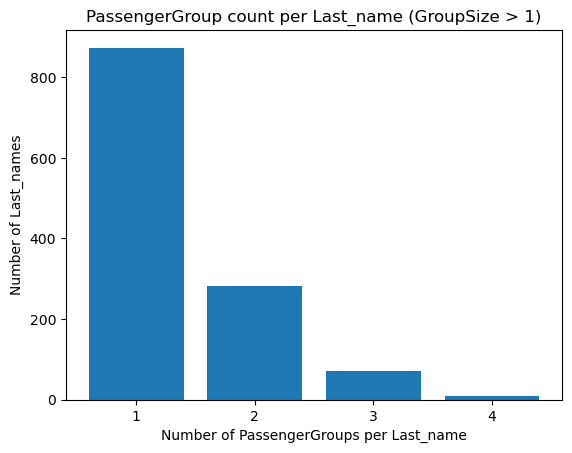

In [111]:
# New feeature GroupSize
df['GroupSize'] = df.groupby('PassengerGroup')['PassengerGroup'].transform('size')

df_multi = df[df['GroupSize'] > 1]

unique_pg_per_ln = (
    df_multi
    .groupby('Last_name')['PassengerGroup']
    .nunique()
)

counts = unique_pg_per_ln.value_counts().sort_index()

plt.bar(counts.index.astype(str), counts.values)
plt.xlabel('Number of PassengerGroups per Last_name')
plt.ylabel('Number of Last_names')
plt.title('PassengerGroup count per Last_name (GroupSize > 1)')
plt.show()

Imputing Last_name from PassengerGroup:

The plot shows that most passenger groups share a single last name.
Assumption for imputation:
- Missing `Last_name` values were imputed only when a passenger group contained more than one member and exactly one known surname.

***[7]*** AI use

In [112]:
LN_start = df['Last_name'].isna().sum()

for _ , g in df.groupby('PassengerGroup'):

    # Only fill if group has more than 1 member (otherwise we can't be sure)
    if len(g) <= 1:
        continue

    # Get known last names in the group
    known_last_names = g['Last_name'].dropna().unique()

    # Only fill if there is exactly 1 known last name in the group (otherwise we can't be sure)
    if len(known_last_names) != 1:
        continue

    df.loc[g.index, 'Last_name'] = g['Last_name'].fillna(known_last_names[0])


In [113]:
print('#Last_name missing values before:', LN_start)
print('#Last_name missing values after:', (df['Last_name'].isna().sum()))

#Last_name missing values before: 200
#Last_name missing values after: 125


No additional features provide reliable and high confidence information for `Last_name` inference. Remaining missing values are therefore labeled as Unknown.

In [114]:
df['Last_name'] = df['Last_name'].fillna('Unknown')

update familysize

In [115]:
# Count occurrences of each last name
last_name_counts = df['Last_name'].value_counts()

# Map counts back to rows
df['FamilySize'] = df['Last_name'].map(last_name_counts)

# Unknown surname => no family
df.loc[df['Last_name'] == 'unknown', 'FamilySize'] = 0

# Unique last names => no family
df.loc[df['FamilySize'] == 1, 'FamilySize'] = 0

**Cabin_side**

In [116]:
# Function to compute unique counts of a feature per PassengerGroup
def unique_counts_per_PassengerGroup(df, feature):
    per_group = (
        df[df['GroupSize'] > 1]
        .groupby('PassengerGroup')[feature]
        .nunique(dropna=True)
    )
    return per_group.value_counts().sort_index()

In [117]:
Group_CS = unique_counts_per_PassengerGroup(df, 'Cabin_side')

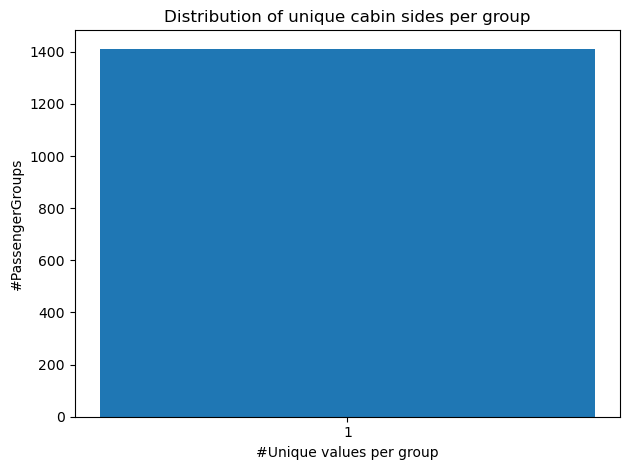

In [118]:
plt.bar(Group_CS.index.astype(str), Group_CS.values)
plt.xlabel('#Unique values per group')
plt.ylabel('#PassengerGroups')
plt.title('Distribution of unique cabin sides per group')

plt.tight_layout()
plt.show()

Cabin features within a group (GroupSize > 1):

Observed pattern:
- Passengers within the same `PassengerGroup` share exactly one cabin side.

How we use it:
- For missing `Cabin_side`, we fill it using group-based imputation, assigning the side observed for the passenger group.

In [119]:
CS_start = df['Cabin_side'].isna().sum()

for _, g in df.groupby('PassengerGroup'):

    # Only fill if group has more than 1 member
    if len(g) <= 1:
        continue

    # Get known cabin sides in the group
    known_side = g['Cabin_side'].dropna().unique()

    # Fill missing Cabin_side within the group
    df.loc[g.index, 'Cabin_side'] = g['Cabin_side'].fillna(known_side[0])

print('#Cabin_side missing values before:', CS_start)
print('#Cabin_side missing values after:', df['Cabin_side'].isna().sum())

#Cabin_side missing values before: 199
#Cabin_side missing values after: 99


Try to fill the rest, so we examine the correlation between Cabin_side to other features.

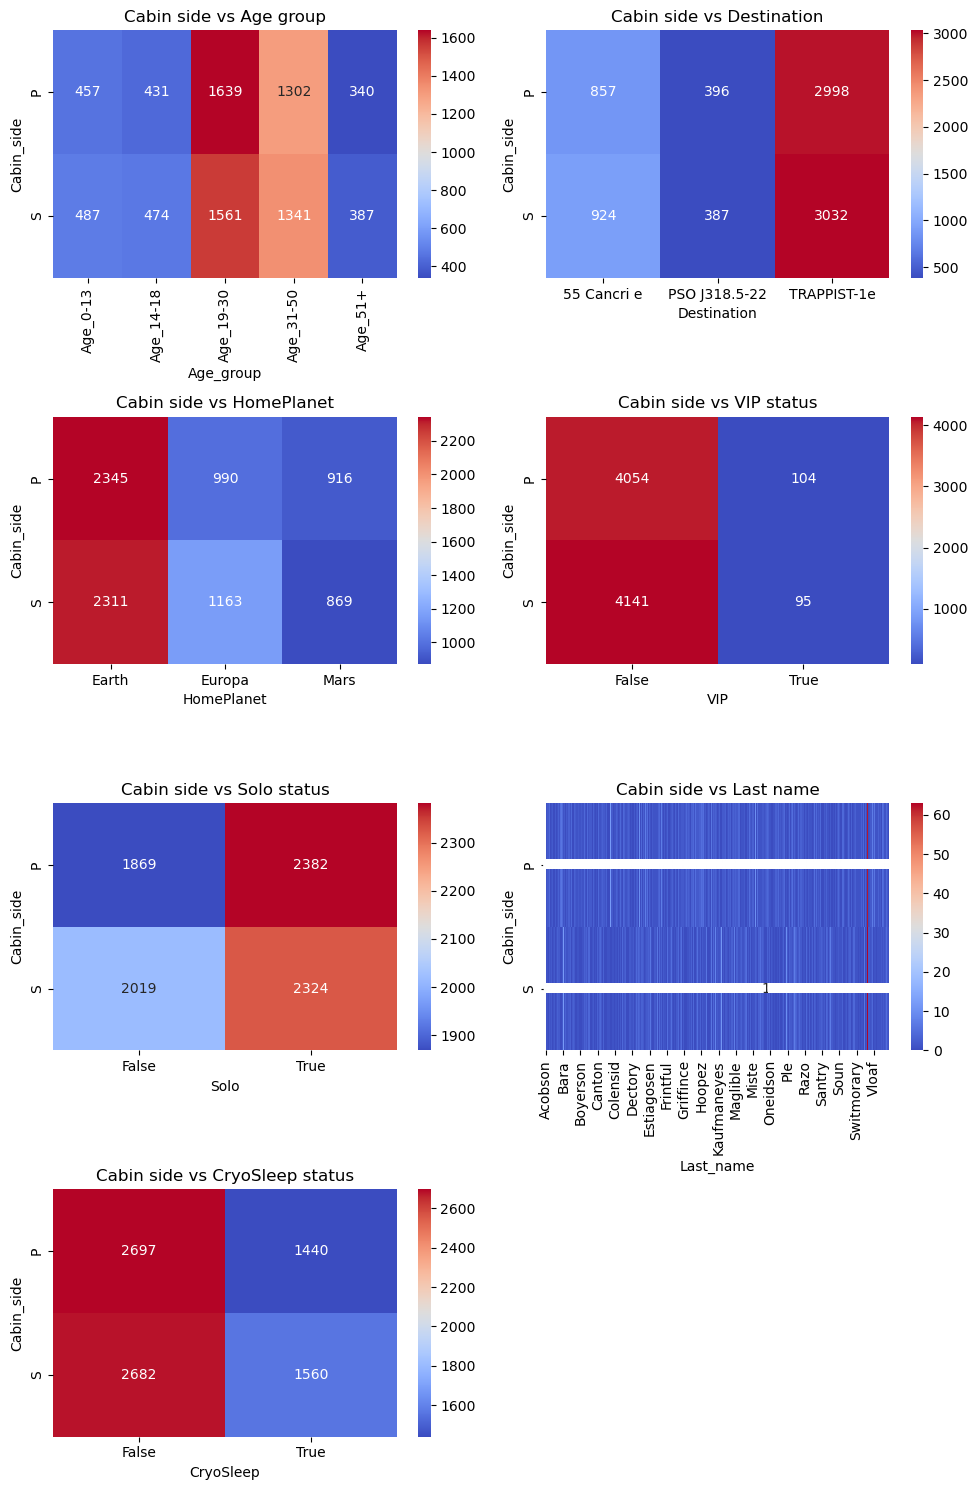

In [120]:
features = [
    ('Age_group', 'Cabin side vs Age group'),
    ('Destination', 'Cabin side vs Destination'),
    ('HomePlanet', 'Cabin side vs HomePlanet'),
    ('VIP', 'Cabin side vs VIP status'),
    ('Solo', 'Cabin side vs Solo status'),
    ('Last_name', 'Cabin side vs Last name'),
    ('CryoSleep', 'Cabin side vs CryoSleep status'),
]

plt.figure(figsize=(10,15))

for i, (feat, title) in enumerate(features, 1):
    plt.subplot(4, 2, i)
    
    table = (
        df.groupby([feat, 'Cabin_side'])
          .size()
          .unstack(fill_value=0)
    )
    
    sns.heatmap(
        table.T,
        annot=True,
        fmt=".0f",
        cmap='coolwarm'
    )
    
    plt.title(title)

plt.tight_layout()
plt.show()


None of the graphs provide sufficient justify for a reliable imputation rule.

thats the best we can do with cabin side, leave the rest 'unknown' and the one hot encode will handle them later.

In [121]:
df['Cabin_side'] = df['Cabin_side'].fillna('unknown')

**Cabin_deck**

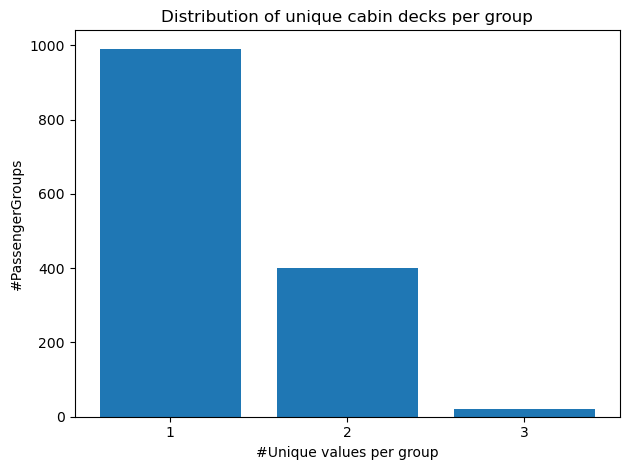

In [122]:
Group_CD = unique_counts_per_PassengerGroup(df, 'Cabin_deck')

plt.bar(Group_CD.index.astype(str), Group_CD.values)
plt.xlabel('#Unique values per group')
plt.ylabel('#PassengerGroups')
plt.title('Distribution of unique cabin decks per group')

plt.tight_layout()
plt.show()

Less deterministic than `Cabin_side` but still consistent, we completed the missing decks by inserting the cabin_deck value of a known deck from their same group, where we require that a 'known deck' only exists when that group has the same deck number for all passengers in the group.

In [123]:
CD_start = df['Cabin_deck'].isna().sum()

for _, g in df.groupby('PassengerGroup'):

    # Only fill if group has more than 1 member
    if len(g) <= 1:
        continue

    # Get known cabin decks in the group
    known_decks = g['Cabin_deck'].dropna().unique()

    # Only deterministic groups
    if len(known_decks) != 1:
        continue

    df.loc[g.index, 'Cabin_deck'] = g['Cabin_deck'].fillna(known_decks[0]) # Fill missing Cabin_deck within the group


print('#Cabin_deck missing before:', CD_start)
print('#Cabin_deck missing after:', df['Cabin_deck'].isna().sum())


df['Cabin_deck'] = df['Cabin_deck'].fillna('unknown') # Fill remaining missing values with 'unknown'

#Cabin_deck missing before: 199
#Cabin_deck missing after: 112


**Cabin number**

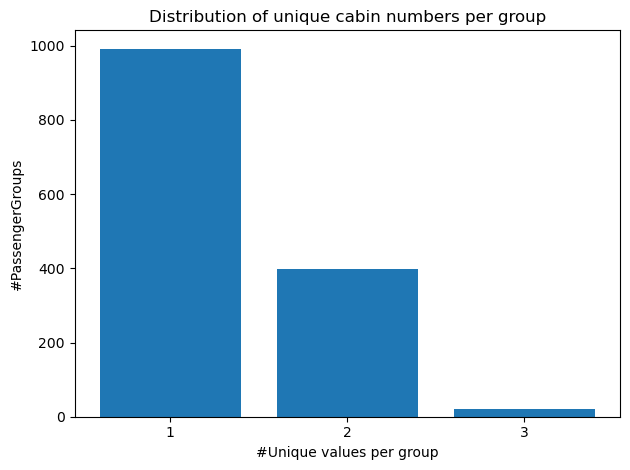

In [124]:
Group_CN = unique_counts_per_PassengerGroup(df, 'Cabin_number')

plt.bar(Group_CN.index.astype(str), Group_CN.values)
plt.xlabel('#Unique values per group')
plt.ylabel('#PassengerGroups')
plt.title('Distribution of unique cabin numbers per group')

plt.tight_layout()
plt.show()

From the same reasons as the `cabin_deck`, we filled the missing values the same.

In [125]:
CN_start = df['Cabin_number'].isna().sum()

for _, g in df.groupby('PassengerGroup'):

    if len(g) <= 1:
        continue

    known_numbers = g['Cabin_number'].dropna().unique()

    # only unambiguous cases
    if len(known_numbers) != 1:
        continue

    df.loc[g.index, 'Cabin_number'] = g['Cabin_number'].fillna(known_numbers[0])

print('#Cabin_number missing before:', CN_start)
print('#Cabin_number missing after:', df['Cabin_number'].isna().sum())

max_cabin_num = max(df['Cabin_number'])

df['Cabin_number'] = df['Cabin_number'].fillna(max_cabin_num + 1) # Fill remaining missing values with max_cabin_num + 1

#Cabin_number missing before: 199
#Cabin_number missing after: 112


**VIP**

VIP missing values will be filled with False because this is the majority of the values in it and VIP is very skewed to False.

In [126]:
print(df['VIP'].value_counts())
# Fill missing VIP values with False
df['VIP'] = df['VIP'].fillna(False)

print('#VIP missing values',df['VIP'].isna().sum())

VIP
False    8291
True      199
Name: count, dtype: int64
#VIP missing values 0


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18928\3069471200.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['VIP'] = df['VIP'].fillna(False)


**AGE**

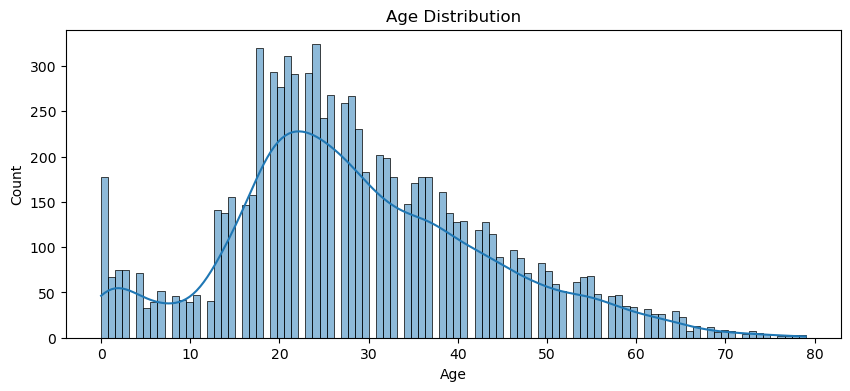

In [127]:
# age distribution total
plt.figure(figsize=(10,4))
sns.histplot(data=df, x='Age', bins=100, kde=True)
plt.title('Age Distribution')
plt.show()

Age distribution inference:

- Most passengers appear to be in the 18-40 range.
- There is a smaller cluster of children (approximately 0-12).
- There is right skewed with a long tail of older passengers.

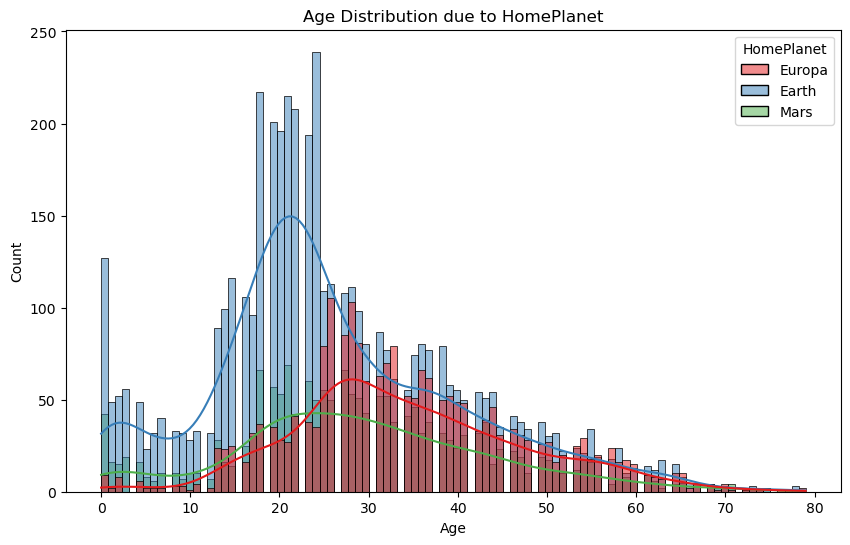

In [128]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, bins=100 ,x='Age', hue='HomePlanet', kde=True, palette='Set1')
plt.title('Age Distribution due to HomePlanet')
plt.show()

Imputation implication:
- Because the distribution is right-skewed and contains outliers, median age is typically safer than mean if we impute a single value.

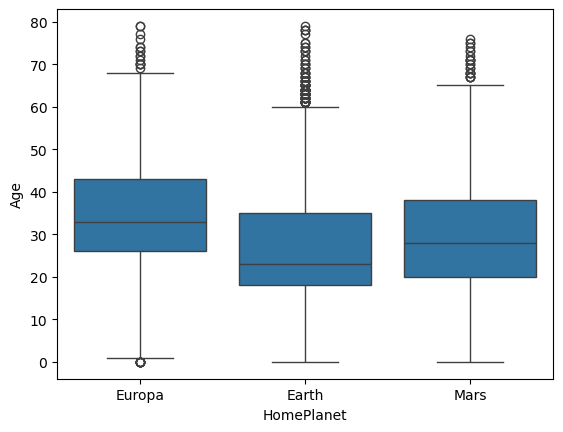

In [129]:
sns.boxplot(x='HomePlanet', y='Age', data=df)
plt.show()

In [130]:
# Missing values before
Age_bef = df['Age'].isna().sum()

# Fill missing Age using median per HomePlanet
df['Age'] = df['Age'].fillna(df.groupby('HomePlanet')['Age'].transform('median'))

# Missing values after
print('#Age missing values before:', Age_bef)
print('#Age missing values after:', df['Age'].isna().sum())


#Age missing values before: 179
#Age missing values after: 0


Update Age group.

In [131]:
df['Age_group']=np.nan
df.loc[df['Age']<=12,'Age_group']='Age_0-12'
df.loc[(df['Age']>12) & (df['Age']<=17),'Age_group']='Age_13-17'
df.loc[(df['Age']>17) & (df['Age']<=25),'Age_group']='Age_18-25'
df.loc[(df['Age']>25) & (df['Age']<=30),'Age_group']='Age_26-30'
df.loc[(df['Age']>30) & (df['Age']<=50),'Age_group']='Age_31-50'
df.loc[df['Age']>50,'Age_group']='Age_51+'

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18928\2200636527.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Age_0-12' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Age']<=12,'Age_group']='Age_0-12'


**CryoSleep**

we believe that if we want to fill CryoSleep - Best way is to rely on their NoSpendings feature;
if someone's NoSpendings == False (means he spent something) and we have NaN CryoSleep => we'll assign it as False.

CryoSleep
False    5439
True     3037
Name: count, dtype: int64


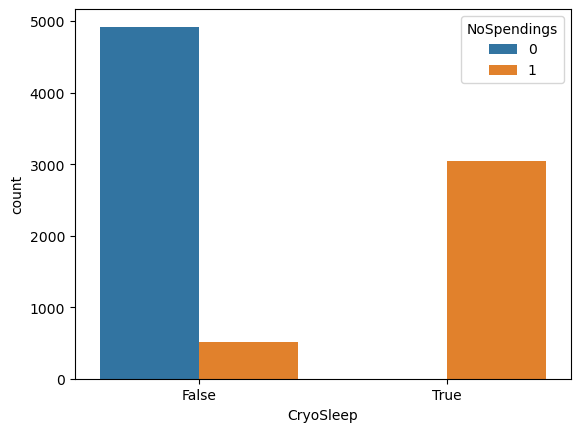

In [132]:
# Details about CryoSleep feature
print(df['CryoSleep'].value_counts())

sns.countplot(x='CryoSleep', hue='NoSpendings', data=df)
plt.show()

***

as we can infer, The passengers who are in CryoSleep had no Spendings.

**BeCareful !** if someone has True on hi's NoSpendings column we can't say that he is in CryoSleep.

In [ ]:
Cryo_bef = df['CryoSleep'].isna().sum()

# Fill missing CryoSleep values based on where NoSpendings is False
CryoFilter = df['CryoSleep'].isna() & (df['NoSpendings'] == False)
df.loc[CryoFilter, 'CryoSleep'] = False

# Print number of missing values left
print('#CryoSleep missing values before:', Cryo_bef)
print('#CryoSleep missing values after:', df['CryoSleep'].isna().sum())

#CryoSleep missing values before: 217
#CryoSleep missing values after: 98


for the rest, Use the most common CryoSleep value.

In [ ]:
Cryo_bef = df['CryoSleep'].isna().sum()

df['CryoSleep'].fillna(df['CryoSleep'].mode()[0], inplace=True)

# Print number of missing values left
print('#CryoSleep missing values before:', Cryo_bef)
print('#CryoSleep missing values after:', df['CryoSleep'].isna().sum())

#CryoSleep missing values before: 98
#CryoSleep missing values after: 0


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15060\571677394.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CryoSleep'].fillna(df['CryoSleep'].mode()[0], inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15060\571677394.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CryoSleep'].fillna(d

**Expenses**

In [ ]:
print('Maximum spent by passengers in CryoSleep:',df.loc[df['CryoSleep']==True,spending_cols].sum(axis=1).max())

Maximum spent by passengers in CryoSleep: 0.0


Passengers is CryoSleep dont spend money.

In [ ]:
# Missing values before
E_bef=df[spending_cols].isna().sum().sum()

# CryoSleep has no expenditure
for col in spending_cols:
    df.loc[(df[col].isna()) & (df['CryoSleep']==True), col]=0

# Print number of missing values left
print('#Expenditure missing values before:',E_bef)
print('#Expenditure missing values after:',df[spending_cols].isna().sum().sum())

#Expenditure missing values before: 943
#Expenditure missing values after: 582


In [ ]:
# Joint distribution
df.groupby(['HomePlanet','Solo','Age_group'])['TotalSpent'].mean().unstack().fillna(0)

Age_group         Age_0-12    Age_13-17    Age_18-25    Age_26-30  \
HomePlanet Solo                                                     
Earth      False       0.0   701.267606   741.763926   900.333333   
           True        0.0   634.395604   776.228682   785.133858   
Europa     False       0.0  1102.955752  2723.480851  3657.607407   
           True        0.0     0.000000  2332.623529  3636.634146   
Mars       False       0.0  1196.301370  1208.330189  1159.195312   
           True        0.0  1847.150000  1161.883333  1007.943820   

Age_group           Age_31-50      Age_51+  
HomePlanet Solo                             
Earth      False   773.833887   811.919540  
           True    810.238210   787.082609  
Europa     False  3973.323826  3507.621951  
           True   3984.079692  3804.560748  
Mars       False  1160.916996  1139.774648  
           True   1151.837079  1130.602564

In [ ]:
# Missing values before
E_bef=df[spending_cols].isna().sum().sum()

# Fill remaining missing values using the median
for col in spending_cols:
    na_rows=df.loc[df[col].isna(),col].index
    df.loc[df[col].isna(),col]=df.groupby(['HomePlanet','Solo','Age_group'])[col].transform(lambda x: x.fillna(x.mean()))[na_rows]
    
# Print number of missing values left
print('#TotalSpent missing values before:',E_bef)
print('#TotalSpent missing values after:',df[spending_cols].isna().sum().sum())

#TotalSpent missing values before: 582
#TotalSpent missing values after: 0


In [ ]:
# Update expenditure and no_spending
df['TotalSpent']=df[spending_cols].sum(axis=1)
df['NoSpendings']=(df['TotalSpent']==0).astype(int)

In [ ]:
print_nulls_info()

+----------------+-----------+------------+-----------------+
|  Column Name   | Data Type | Null Count | Null Percentage |
+----------------+-----------+------------+-----------------+
|  PassengerId   |   object  |     0      |      0.00%      |
|   HomePlanet   |   object  |     0      |      0.00%      |
|   CryoSleep    |    bool   |     0      |      0.00%      |
|  Destination   |   object  |     0      |      0.00%      |
|      Age       |  float64  |     0      |      0.00%      |
|      VIP       |    bool   |     0      |      0.00%      |
|  RoomService   |  float64  |     0      |      0.00%      |
|   FoodCourt    |  float64  |     0      |      0.00%      |
|  ShoppingMall  |  float64  |     0      |      0.00%      |
|      Spa       |  float64  |     0      |      0.00%      |
|     VRDeck     |  float64  |     0      |      0.00%      |
|  Transported   |    bool   |     0      |      0.00%      |
| PassengerGroup |   int64   |     0      |      0.00%      |
|   Grou

Manual OneHotEncode for cabin_number:

In [ ]:
# One-hot encode as cabin regions
df['Cabin_region1']=(df['Cabin_number']<300).astype(int)
df['Cabin_region2']=((df['Cabin_number']>=300) & (df['Cabin_number']<600)).astype(int)
df['Cabin_region3']=((df['Cabin_number']>=600) & (df['Cabin_number']<900)).astype(int)
df['Cabin_region4']=((df['Cabin_number']>=900) & (df['Cabin_number']<1200)).astype(int)
df['Cabin_region5']=((df['Cabin_number']>=1200) & (df['Cabin_number']<1500)).astype(int)
df['Cabin_region6']=((df['Cabin_number']>=1500) & (df['Cabin_number']<=max_cabin_num)).astype(int)

**Drop unwanted features**

In [ ]:
df.drop(['PassengerId', 'PassengerGroup', 'GroupSize','Age_group', 'Cabin_number', 'VIP'], axis=1, inplace=True)

*Explanation for drops:*

1. **PassengerId**: identifier only. It does not represent a stable property of the passenger, and using it can cause leakage-like behavior (the model can memorize ids).
2. **PassengerGroup** and **GroupSize**: we use these during EDA and for imputations/feature engineering. After we create the final engineered features (such as `Solo`, `Family_size`), keeping group identifiers can overfit and is not meaningful for unseen groups.
3. **Age_group**: derived directly from `Age`. If we keep both, they are redundant. We keep the version that empirically performs better (later validated by CV).
4. **Cabin_number**: high cardinality and close to an identifier. Unless we justify a clear mapping (for example, via regression per deck) and validate its benefit, it can add noise and overfitting risk.
5. **VIP**: optional feature. If dropped, the justification must be performance-based (for example: unstable signal due to rarity) and verified via CV. If you keep it, remove it from the drop list above.

**Encoding**

Boolean to int:
Changing CryoSleep and Transported to 0,1 instead of Boolean values.

In [ ]:
df['CryoSleep'] = df['CryoSleep'].astype(int)
df['Solo'] = df['Solo'].astype(int)
df['Transported'] = df['Transported'].astype(int)

OneHotEncoding HomePlanet, Destination, Cabin_deck, Cabin_side.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical columns.
# Note: we do this AFTER imputations, so remaining NaNs should be handled first.
one_hot_cols = ['HomePlanet', 'Destination', 'Cabin_deck', 'Cabin_side']

enc = OneHotEncoder(
    sparse_output=False,
    handle_unknown="ignore"
)

ohe = enc.fit_transform(df[one_hot_cols])

ohe_df = pd.DataFrame(
    ohe,
    columns=enc.get_feature_names_out(one_hot_cols),
    index=df.index
)

# Replace original categorical columns with one-hot columns
df = df.drop(columns=one_hot_cols).join(ohe_df)

# Optional sanity check: ensure there are no object columns left
obj_cols = df.select_dtypes(include=["object"]).columns.tolist()
print("Remaining object columns:", obj_cols)

Remaining object columns: ['First_name', 'Last_name']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   int64  
 1   Age                        8693 non-null   float64
 2   RoomService                8693 non-null   float64
 3   FoodCourt                  8693 non-null   float64
 4   ShoppingMall               8693 non-null   float64
 5   Spa                        8693 non-null   float64
 6   VRDeck                     8693 non-null   float64
 7   Transported                8693 non-null   int64  
 8   Solo                       8693 non-null   int64  
 9   TotalSpent                 8693 non-null   float64
 10  NoSpendings                8693 non-null   int64  
 11  Cabin_region1              8693 non-null   int64  
 12  Cabin_region2              8693 non-null   int64  
 13  Cabin_region3              8693 non-null   int64

Dropping First_name and Last_name:

Reasoning:
- As raw strings, names cannot be used directly by the scikit-learn classifiers.
- Converting names into useful numeric features requires a clear hypothesis (for example, family identification, title extraction, or frequency encoding).
- Since we already capture family/group information through engineered features, and to avoid adding weak assumptions, we drop these string columns.

In [ ]:
df.drop(['First_name', 'Last_name'], axis=1, inplace=True)

**Train Test Split**

We used an 80/20 train-test split to ensure sufficient training data while keeping an independent test set for final evaluation.

In [ ]:
# split data into features and labels
X = df.drop(['Transported'], axis=1)
y = df['Transported']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y)


**Classifiers Imports**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate

**Models To Examine:**

In [ ]:
models = {
    "KNN": KNeighborsClassifier(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "GNB": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(),
    "MLP": MLPClassifier(),
    "XGBoost": GradientBoostingClassifier()
}

### Cross-validation setup and evaluation metrics

Why cross-validation:
- Single train-test splits can give a noisy estimate of performance (especially after multiple preprocessing decisions).
- We use repeated stratified k-fold CV on the training set only.

Metrics reported:
- **Accuracy**: overall correctness.
- **Precision**: among predicted positives, how many are correct.
- **Recall**: among actual positives, how many are found.
- **ROC AUC**: threshold-independent ranking quality (useful when we care about separating classes, not only one fixed threshold).

Model selection rule:
- Primary: ROC AUC (stable, threshold-independent).
- Secondary: recall/precision tradeoff depending on which error type is more costly (must be justified in the report).

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=20)
scoring = ['accuracy', 'precision', 'recall', 'roc_auc']

cv_results = {}

for name, model in models.items():

    scores = cross_validate(
        model,
        X_train,
        y_train,
        cv=cv,
        scoring=scoring,
        n_jobs=-1
    )

    cv_results[name] = {
        metric: scores[f'test_{metric}'].mean()
        for metric in scoring
    }

In [ ]:
results_df = pd.DataFrame(cv_results).T
results_df.sort_values('roc_auc', ascending=False)

,accuracy,precision,recall,roc_auc
XGBoost,0.805321,0.791372,0.833437,0.898078
Random Forest,0.802689,0.831822,0.762565,0.885636
Logistic Regression,0.795312,0.781367,0.824715,0.881102
LDA,0.782212,0.796591,0.762347,0.867538
GNB,0.766502,0.724455,0.866035,0.856610
MLP,0.769635,0.762372,0.801626,0.850301
QDA,0.587755,0.552134,0.973738,0.845840
SVM,0.789337,0.748828,0.875599,0.845659
KNN,0.772254,0.773717,0.774528,0.841272
Decision Tree,0.745980,0.747090,0.749556,0.747411


In [ ]:
print("Worst model based on ROC AUC:", round(results_df['roc_auc'],3).idxmin())
print("Worst model based on recall:", round(results_df['recall'],3).idxmin())
print("Worst model based on precision:", round(results_df['precision'],3).idxmin())
print("Worst model based on accuracy:", round(results_df['accuracy'],3).idxmin())

Worst model based on ROC AUC: Decision Tree
Worst model based on recall: Decision Tree
Worst model based on precision: QDA
Worst model based on accuracy: QDA


In [ ]:
print("Best model based on ROC AUC:", round(results_df['roc_auc'],3).idxmax())
print("Best model based on recall:", round(results_df['recall'],3).idxmax())
print("Best model based on precision:", round(results_df['precision'],3).idxmax())
print("Best model based on accuracy:", round(results_df['accuracy'],3).idxmax())

Best model based on ROC AUC: XGBoost
Best model based on recall: QDA
Best model based on precision: Random Forest
Best model based on accuracy: XGBoost


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optim

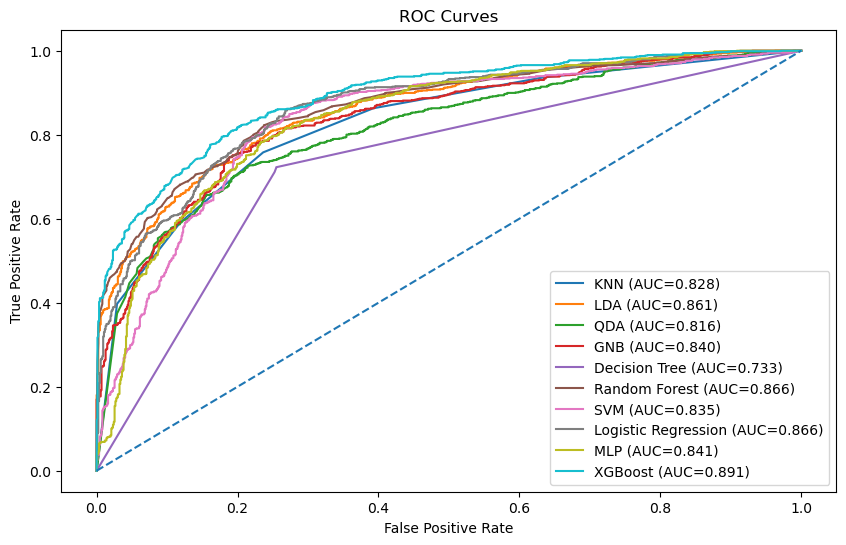

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


plt.figure(figsize=(10, 6))

for name, model in models.items():
    # Fit model
    model.fit(X_train, y_train)

    # Get scores
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)

    # ROC
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc = roc_auc_score(y_test, y_score)

    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")

# Random baseline
plt.plot([0, 1], [0, 1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()


### Hyperparameter tuning for the best-performing model(s)

After comparing baseline models, tune the top model(s) with `GridSearchCV` or `RandomizedSearchCV` on the training set only.
Report:
- The best hyperparameters found
- Cross-validated score (same metric used for selection, for example ROC AUC)
- Final evaluation on the held-out test set (confusion matrix, classification report, ROC curve)

Note: Use pipelines when scaling is required (SVM, Logistic Regression, KNN, MLP). Tree-based models usually do not require scaling.


XGBoost
Best ROC AUC (CV): 0.9038
Best params: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 500, 'subsample': 0.8}

Logistic Regression
Best ROC AUC (CV): 0.8883
Best params: {'clf__C': 10.0, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}

Random Forest
Best ROC AUC (CV): 0.8976
Best params: {'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500}

Selected best tuned model: XGBoost

Classification report (test):
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       863
           1       0.81      0.81      0.81       876

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



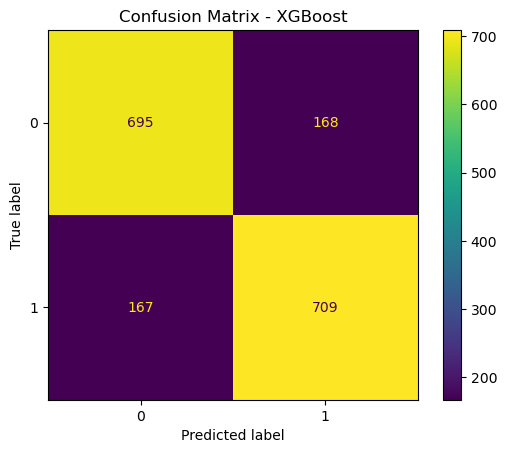

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Choose candidate models to tune (example: Logistic Regression and Random Forest).
# Replace these choices based on your CV table (results_df).
candidates = {
    "XGBoost": (
        GradientBoostingClassifier(random_state=0),
        {
            "n_estimators": [200, 500],
            "learning_rate": [0.03, 0.1],
            "max_depth": [2, 3],
            "min_samples_split": [2, 10],
            "min_samples_leaf": [1, 5],
            "subsample": [0.8, 1.0],
            "max_features": [None, "sqrt"]
        }
    ),
    "Logistic Regression": (
        Pipeline([
            ("scaler", StandardScaler()),
            ("clf", LogisticRegression(max_iter=5000))
        ]),
        {
            "clf__C": [0.1, 1.0, 3.0, 10.0],
            "clf__penalty": ["l2"],
            "clf__solver": ["lbfgs"]
        }
    ),
    "Random Forest": (
        RandomForestClassifier(random_state=0),
        {
            "n_estimators": [200, 500],
            "max_depth": [None, 8, 16],
            "min_samples_split": [2, 10],
            "min_samples_leaf": [1, 5]
        }
    )
}

best_models = {}
for name, (estimator, param_grid) in candidates.items():
    gs = GridSearchCV(
        estimator=estimator,
        param_grid=param_grid,
        scoring="roc_auc",
        cv=5,
        n_jobs=-1
    )
    gs.fit(X_train, y_train)
    best_models[name] = gs

    print(f"\n{name}")
    print("Best ROC AUC (CV):", round(gs.best_score_, 4))
    print("Best params:", gs.best_params_)

# Pick the single best tuned model by CV ROC AUC
best_name = max(best_models, key=lambda k: best_models[k].best_score_)
best_estimator = best_models[best_name].best_estimator_
print("\nSelected best tuned model:", best_name)

# Final evaluation on the held-out test set
best_estimator.fit(X_train, y_train)
y_pred = best_estimator.predict(X_test)

print("\nClassification report (test):")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(f"Confusion Matrix - {best_name}")
plt.show()


### Conclusion and chosen classifier

In the final report (PDF/Word), summarize:
- The preprocessing choices that were tested (and why)
- The model comparison table (CV results)
- The tuned model and chosen hyperparameters
- The final test-set evaluation
- A short justification for why this classifier is expected to generalize best to unseen data
